Text(0, 0.5, 'relu(x), tanh(x)')

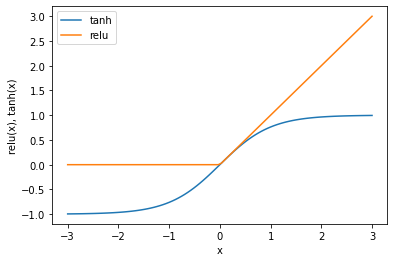

In [18]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

# display(mglearn.plots.plot_single_hidden_layer_graph())

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Training set accuracy:0.9866666666666667
Test set accuracy:0.88


c:\python\miniconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


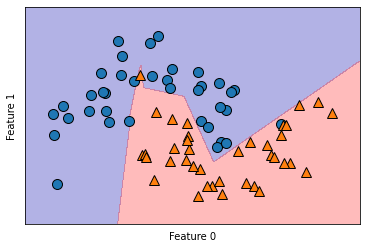

In [25]:
import mglearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# hidden_layer_sizes[10] = one hidden layer and 10 hidden units
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("Training set accuracy:{}".format(mlp.score(X_train, y_train)))
print("Test set accuracy:{}".format(mlp.score(X_test, y_test)))

c:\python\miniconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training set accuracy:1.0
Test set accuracy:0.84


c:\python\miniconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


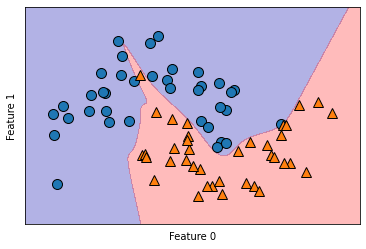

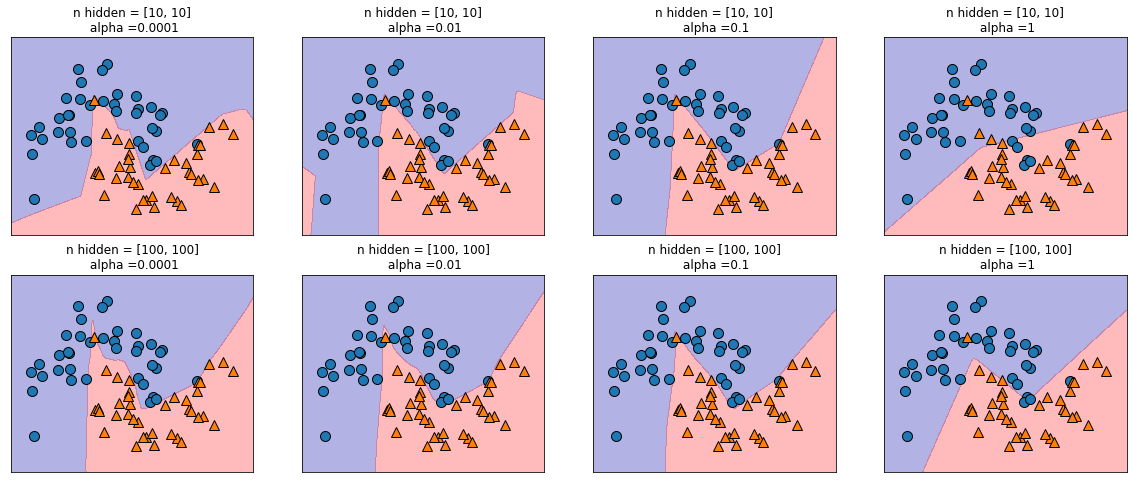

In [5]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# hidden_layer_sizes[10, 10] = two hidden layer with 10 hidden units each
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("Training set accuracy:{}".format(mlp.score(X_train, y_train)))
print("Test set accuracy:{}".format(mlp.score(X_test, y_test)))

fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax,  alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', 
                            random_state=0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n hidden = [{}, {}]\n alpha ={}".format(n_hidden_nodes, n_hidden_nodes, alpha))

Accuracy on training set 0.927
Accuracy on test set 0.951


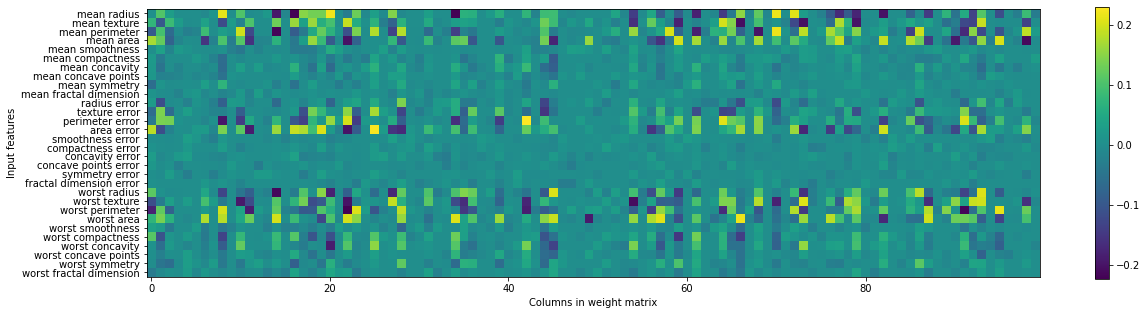

In [17]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=3)

# compute the mean value per feature on the train set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation for each feature in the train set
std_on_train = X_train.std(axis=0)

# subtract the mean and scale by inverse of standard deviation
# afterward mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use the same TRANSFORMATION(mean and std on train) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(alpha=1, random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(mlp.score(X_test, y_test)))

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input features")
plt.colorbar()

In [37]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classess red and blue for illustration purpose
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print("X_test shape{}".format(X_test.shape))
print("decision function shape{}".format(gbrt.decision_function(X_test).shape))

print("Threshold decision function{}".format(gbrt.decision_function(X_test)>0))
print("Predictions{}".format(gbrt.predict(X_test)))
print("Uncertainity estimates{}".format(gbrt.decision_function(X_test)[:]))
uncertainity_estimates = []
for i in gbrt.decision_function(X_test)[:]:
    uncertainity_estimates.append(int(i))

print("Uncertainity estimates{}".format(uncertainity_estimates))

# make the boolean True/False into 1/0
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 1/0 as indices in classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the gbrt.predict
print("pred is equal to predictions{}".format(np.all(pred == gbrt.predict(X_test))))

decision_function = gbrt.decision_function(X_test)
print("decision_function min:max :: {:.2}:{:.2}".format(np.min(decision_function), np.max(decision_function)))

X_test shape(25, 2)
decision function shape(25,)
Threshold decision function[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
Uncertainity estimates[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]
Uncertainity estimates[4, -1, -3, -3, 4, 3, -7, 4, 1, 3, -6, 4, 3, -1, 3, -4, -1, -3, 4, 4, 4, 0, 2, -2, -1]
pred is equal to predictionsTrue
decision_function min:max :: -7.7:4.3


Shape of probabilities(25, 2)
Predicted probailities[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


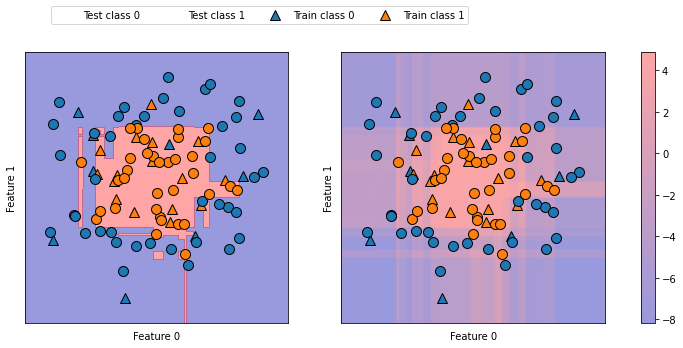

In [4]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
 alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())

axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

print("Shape of probabilities{}".format(gbrt.predict_proba(X_test).shape))
print("Predicted probailities{}".format(gbrt.predict_proba(X_test[:6])))

In [14]:
# uncertainity in multi class classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("Decision function shape{}".format(gbrt.decision_function(X_test).shape))
print("Decision function \n{}".format(gbrt.decision_function(X_test)[:6 :]))

print("Argmax of decision function \n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions \n{}".format(gbrt.predict(X_test)))

print("Predict probabilities\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("sum of probabilities of each class for each data point{}".format(gbrt.predict_proba(X_test[:6]).sum(axis=1)))

logreg = LogisticRegression()

named_target = iris.target_names[y_train]

logreg.fit(X_train, y_train)

print("Unique classess in training data:{}".format(logreg.classes_))
print("Predictions {}".format(logreg.predict(X_test)[:6]))

argmax_decision_function = np.argmax(logreg.decision_function(X_test), axis=1)

print("Argmax_decision_function {}".format(argmax_decision_function[:6]))
print("Argmax_decision function combined with classes_{}".format(logreg.classes_[argmax_decision_function][:6]))

Decision function shape(38, 3)
Decision function 
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]
Argmax of decision function 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predict probabilities
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
sum of probabilities of each class for each data point[1. 1. 1. 1. 1. 1.]
Unique classess in training data:[0 1 2]
Predictions [1 0 2 1 1 0]
Argmax_decision_function [1 0 2 1 1 0]
Argmax_decision function combined with classes_[1 0 2 1 1 0]


c:\python\miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
